# opencv 임계점 처리

cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수

- image : 처리할 Gray Scale 이미지
- thresh : 임계 값 (전체 픽셀에 적용), 한계치
- max_value : 임계 값을 넘었을 때 적용할 값
- type : 임계점을 처리하는 방식
1. THRESH_BINARY : 임계 값보다 크면 max_value, 작으면 0
2. THRESH_BINARY_INV : 임계 값보다 작으면 max_vlaue, 크면 0
3. THRESH_TRUNC : 임계 값보다 크면 임계 값, 작으면 그대로
4. THRESH_TOZERO : 임계 값보다 크면 그대로, 작으면 0
5. THRESH_TOZERO_INV : 임계 값보다 크면 0, 작으면 그대로

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [30]:
image_path = 'C:/Users/sungyun/Desktop/etc/img/sibadog.jpg'
image_path2 = 'C:/Users/sungyun/Desktop/etc/img/휴먼졸림체2.jpg'

In [38]:
image

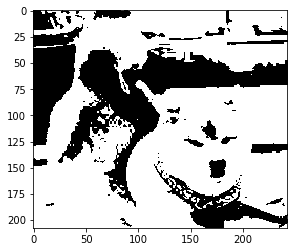

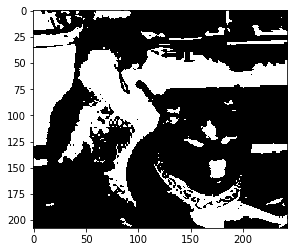

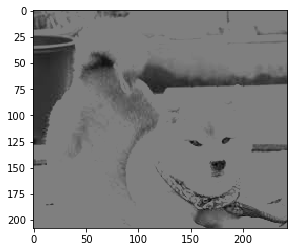

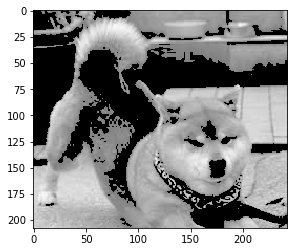

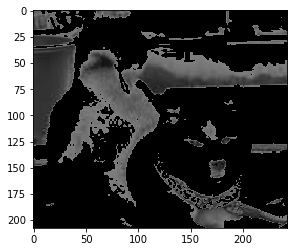

In [39]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

images = []

ret, thres1 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127,255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127,255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127,255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()


# 이미지의 적응 임계점 처리
cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C) : 적응 임계점 처리 함수

- max_value : 임계 값을 넘었을 때 적용할 값
- adaptive_method : 임계값을 결정하는 계산 방법
1. ADAPTIVE_THRESH_MEAN_C : 주변 영역의 평균값으로 결정
2. ADAPTIVE_THRESH_GAUSSIAN_C : 적용할 픽셀 (x,y)를 중심으로 하는 block size * block size 안에 있는 gaussian 윈도우 기반의 가중치들의 합에서 c를 뺀 값을 임계점으로 설정
- type : 임계점을 처리하는 방식
- block_size : 임계 값을 적용할 영역의 크기
- C : 평균이나 가중 평균에서 차감할 값

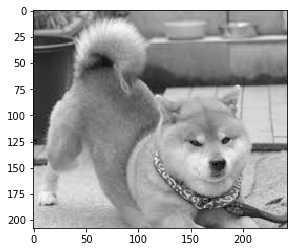

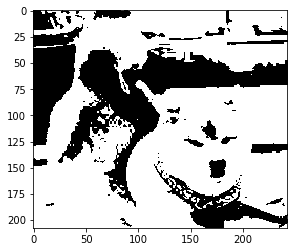

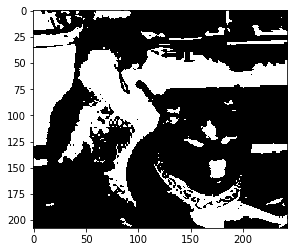

In [42]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127,255, cv2.THRESH_BINARY)
thres2 - cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,21,3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()


cv2.adaptiveThreshold는 자동으로 임계점을 설정하게 끔 해주는 것, 여러개의 임계점을 처리해주는 장점이 있다.